<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5358 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB
type
Movie      3445
TV Show    1912
TV Sh         1
Name: count, dtype: int64
country
United States     1545
India              602
Japan              203
United Kingdom     190
South Korea        138
Spain              110
Canada     

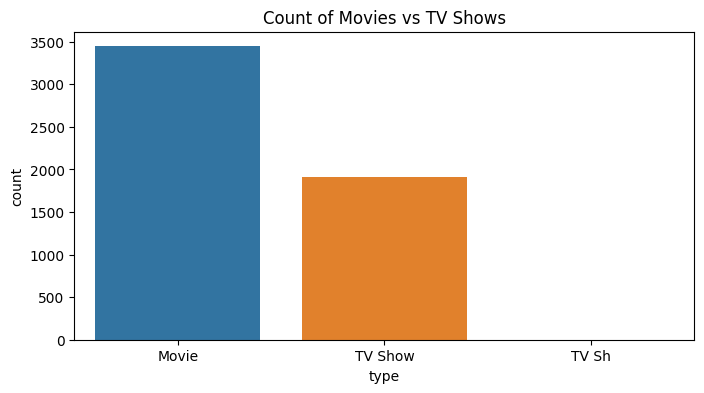

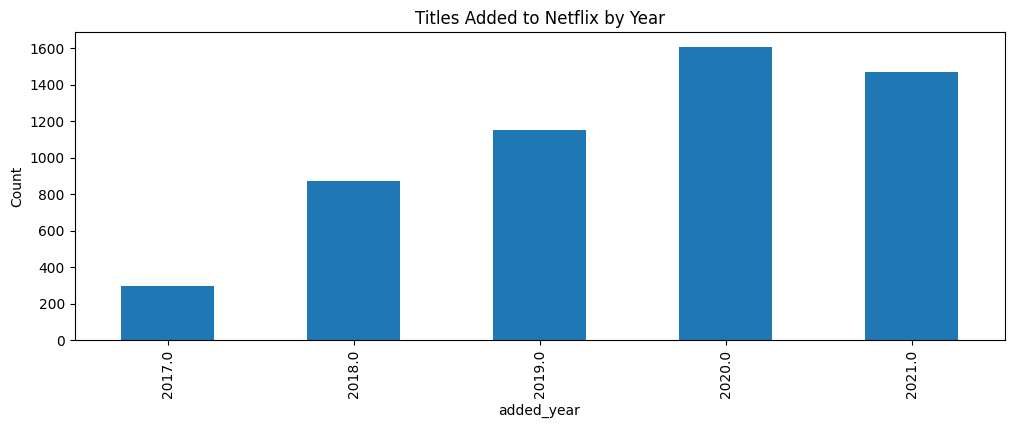

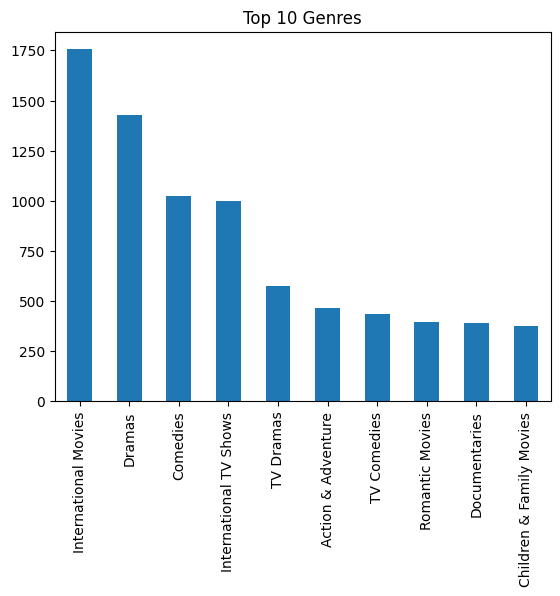

In [1]:
# 1. Imports and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/dataset-netflix-shows-updated/netflix_data_updated.csv')
df.head()

# 2. Basic Info and Nulls
df.info()
df.isnull().sum()

# 3. Unique value counts
print(df['type'].value_counts())
print(df['country'].value_counts().head(10))

# 4. Fill/Handle Nulls
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 5. Feature Engineering: Extract year/month from 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year

# 6. Visualizations
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

plt.figure(figsize=(12,4))
df['added_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Titles Added to Netflix by Year')
plt.ylabel('Count')
plt.show()

# 7. Genre Analysis
df['genres'] = df['listed_in'].fillna('').apply(lambda x: [g.strip() for g in x.split(',') if g.strip()])
from collections import Counter
genre_counts = Counter([genre for sublist in df['genres'] for genre in sublist])
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()
